STEP: [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
RAMP: [2 3 4 5 6 7 8 8 8 8 8 8 8 8 8 8]
SIGMOID sample (first 20): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


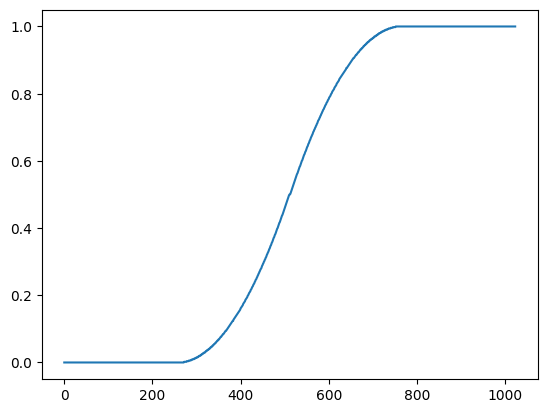

In [1]:
from typing import Union
import numpy as np

ArrayLike = Union[int, np.ndarray, list, tuple]
import matplotlib.pyplot as plt


# -----------------------------
# 1) Função degrau (step)
# -----------------------------
def step_activation(A: ArrayLike, B: ArrayLike, threshold: int) -> np.ndarray:
    """
    Implementa a ativação 'degrau' do artigo:
        y = 1 se (A + B) > threshold, caso contrário 0
    A e B podem ser escalares ou arrays broadcastáveis.
    Saída: array de 0/1 (dtype=int).
    """
    A = np.asarray(A, dtype=int)
    B = np.asarray(B, dtype=int)
    return (A + B > int(threshold)).astype(int)


# -----------------------------------
# 2) Função rampa-com-saturação
# -----------------------------------
def ramp_saturation(A: ArrayLike, B: ArrayLike, saturation: int) -> np.ndarray:
    """
    Implementa a rampa unitária com saturação do artigo:
        y = min(A + B, saturation)
    A e B podem ser escalares ou arrays broadcastáveis.
    """
    A = np.asarray(A, dtype=int)
    B = np.asarray(B, dtype=int)
    sat = int(saturation)
    s = A + B
    s = np.where(s < sat, s, sat)
    return s


# ------------------------------------------------
# 3) Sigmóide aproximada (Kwan) como no artigo
# ------------------------------------------------
def sigmoid_kwan_like(
    Z: ArrayLike,
    L: int = 255,    # nível de saturação (como no VHDL do artigo)
    M: int = 512     # metade da faixa de entrada (Z: 0..511)
) -> np.ndarray:
    """
    Aproximação de sigmóide usada no VHDL do artigo (Sigmoid1).
    Entrada:
      - Z: inteiro(s) na faixa 0..511 (pode ser array)
      - L: saturação superior da saída (0..255), default 255
      - M: constante 512 do código VHDL
    Saída:
      - Inteiro(s) 0..255, com saturação em L.

    Passos (espelhando o VHDL):
        A1 <= Z
        B1 <= M - A1
        ZZ <= B1 * A1
        ZTHETA <= ZZ // 256     (divisão inteira)
        TEMP <= ZTHETA
        SAL <= TEMP if A1 < L else L
    """
    Z = np.asarray(Z, dtype=int)
    A1 = Z
    B1 = M - A1
    ZZ = B1 * A1
    ZTHETA = ZZ // 256  # divisão inteira, como no VHDL
    TEMP = ZTHETA
    # aplica saturação em L quando A1 >= L
    SAL = np.where(A1 < L, TEMP, L)
    # garante faixa 0..L
    SAL = np.clip(SAL, 0, L).astype(int)
    return SAL


# -----------------------------
# Exemplo rápido de uso
# -----------------------------

# 1) Degrau: A é um contador, B constante
A = np.arange(0, 16)            # 0..15
B = 2                           # constante
th = 8                          # threshold
y_step = step_activation(A, B, th)
print("STEP:", y_step)

# 2) Rampa com saturação
y_ramp = ramp_saturation(A, B, saturation=8)
print("RAMP:", y_ramp)

# 3) Sigmóide 'Kwan-like' do artigo
Z = np.arange(0, 512)           # exatamente a faixa usada no VHDL
y_sig = sigmoid_kwan_like(Z, L=255, M=512) / 255 / 2 + 0.5
neg_y_sig = -y_sig[::-1] + 1
print("SIGMOID sample (first 20):", y_sig[:20]//255)


my_y = np.append(neg_y_sig,y_sig)
z2 = np.append(-Z,Z)
plt.plot(my_y)


In [ ]:
import math

def exp_taylor(x, tol=1e-6):
    """
    Compute e^x using the Taylor series expansion.
    
    Args:
        x (float): Exponent value.
        tol (float): Error tolerance (stop when next term < tol).
        
    Returns:
        float: Approximation of e^x.
        int: Number of terms used.
    """
    term = 1.0   # first term (x^0 / 0!)
    result = term
    n = 1
    
    while True:
        term *= x / n   # next term in the series
        if abs(term) < tol:  # stop when term is smaller than tolerance
            break
        result += term
        n += 1
    
    return result, n

# Example usage:
approx, terms = exp_taylor(2, tol=1e-8)
import math

def exp_taylor(x, tol=1e-6):
    """
    Compute e^x using the Taylor series expansion.
    
    Args:
        x (float): Exponent value.
        tol (float): Error tolerance (stop when next term < tol).
        
    Returns:
        float: Approximation of e^x.
        int: Number of terms used.
    """
    term = 1.0   # first term (x^0 / 0!)
    result = term
    n = 1
    
    while True:
        term *= x / n   # next term in the series
        if abs(term) < tol:  # stop when term is smaller than tolerance
            break
        result += term
        n += 1
    
    return result, n

# Example usage:
approx, terms = exp_taylor(0.1, tol=1e-3)
print(f"Approximation: {approx}, math.exp(2) = {math.exp(2)}, terms used = {terms}")

sum_terms = 0
xs = np.arange(1.5, 4, 0.01)   # values from -2 to 2 with step 0.01
for x in xs:
    approx, terms = exp_taylor(x, tol=1e-3)
    sum_terms += terms
print(sum_terms / len(xs))

IndentationError: unexpected indent (1227346844.py, line 64)

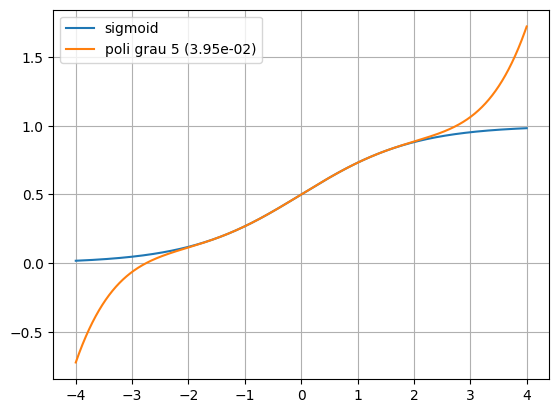

In [ ]:
z = np.arange(-4, 4, 0.0001)

sig = 1 / (1 + np.power(np.e,-z))

p1 = 0.22568*z+0.5
p3 = -0.01655*np.power(z,3)+0.24807*z+0.5
p5 = 0.001484*np.power(z,5)-0.02027*np.power(z,3)+0.24986*z+0.5



plt.plot(z,sig, label="sigmoid")
# plt.plot(z,p1, label="poli grau 1")
# plt.plot(z,p3, label="poli grau 3")

mse = np.mean((sig - p5) ** 2)
plt.plot(z,p5, label=f"poli grau 5 ({mse:.2e})")


plt.legend()
plt.grid()


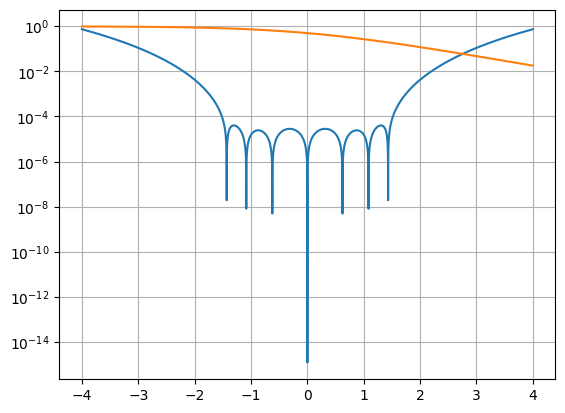

In [ ]:
plt.plot(z,abs(p5-sig))
plt.plot(z,abs(1-sig))



plt.semilogy()
plt.grid()

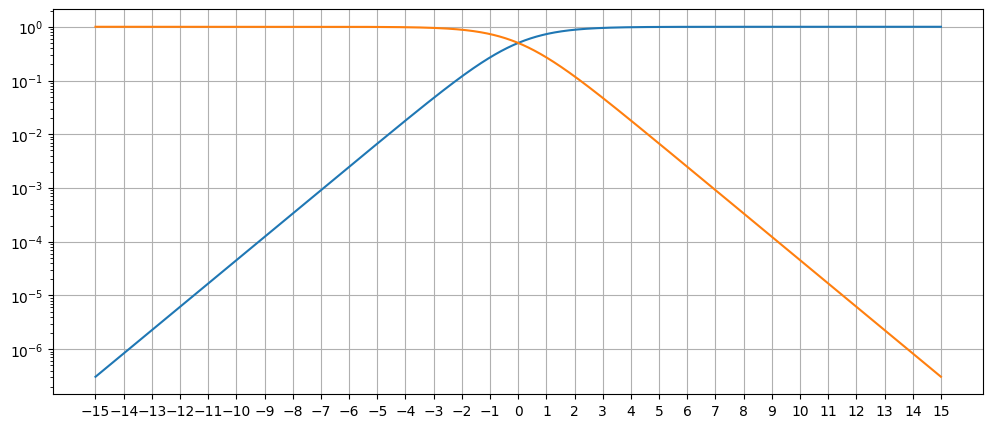

In [ ]:

plt.figure(figsize=(12,5))

z = np.arange(-15, 15, 0.0001)
sig = 1 / (1 + np.power(np.e,-z))
error0 = abs(sig)
error1 = abs(sig-1)
plt.semilogy()
plt.grid()
plt.xticks(np.arange(-15, 16, 1))


plt.plot(z,error0, label="sigmoid")
plt.plot(z,error1, label="sigmoid")



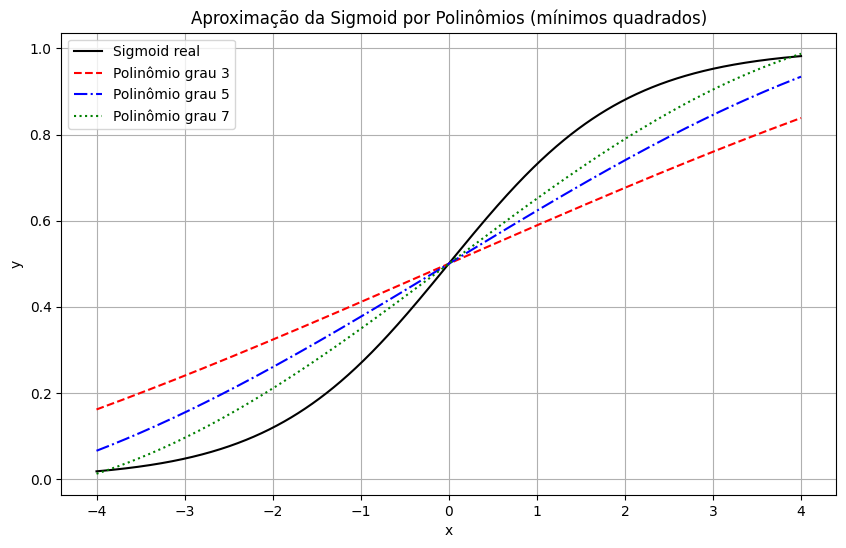

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Polinômios ajustados por mínimos quadrados no intervalo [-15, 15]
def P3(x):
    return -0.000296678768049*x**3 + 0.0893367106352*x + 0.5

def P5(x):
    return 2.87907605958e-06*x**5 - 0.0010171664723*x**3 + 0.124109184776*x + 0.5

def P7(x):
    return -3.13206302332e-08*x**7 + 1.4274266408e-05*x**5 - 0.00218374481102*x**3 + 0.153302691044*x + 0.5

# Gera pontos no intervalo [-15, 15]
x = np.linspace(-4, 4, 1000)

# Valores das funções
y_sigmoid = sigmoid(x)
y_p3 = P3(x)
y_p5 = P5(x)
y_p7 = P7(x)

# Plotagem
plt.figure(figsize=(10,6))
plt.plot(x, y_sigmoid, 'k-', label="Sigmoid real")
plt.plot(x, y_p3, 'r--', label="Polinômio grau 3")
plt.plot(x, y_p5, 'b-.', label="Polinômio grau 5")
plt.plot(x, y_p7, 'g:', label="Polinômio grau 7")

plt.title("Aproximação da Sigmoid por Polinômios (mínimos quadrados)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
import pandas as pd

# Lê o CSV
df = pd.read_csv("../DCVC/saida.txt", header=None)

# Define os nomes das colunas
df.columns = ["id", "d1", "d2", "d3", "d4", "N"]

# Cria a nova coluna Npoints
df["N/4"] =  df["N"]/4
df["Npoints"] = df["d1"] * df["d2"] * df["d3"] * df["d4"] #* df["N/4"]

# Ordena por N em ordem decrescente para garantir que o maior N seja mantido
df = df.sort_values(by="N", ascending=False)

# Remove duplicatas de id, mantendo apenas o maior N
df = df.drop_duplicates(subset="id", keep="first")

# Agora ordena pelo Npoints em ordem decrescente
df = df.sort_values(by="Npoints", ascending=False).reset_index(drop=True)

menor_N = df["N"].min()

print("O menor valor de N é:", menor_N)

num_ids_unicos = df["id"].nunique()
print("Quantidade de IDs únicos:", num_ids_unicos)

# Lista de únicos
ids_unicos = df["d4"].unique()
print("IDs únicos:", ids_unicos)

# Frequência de cada ID
# freq_ids = df["id"].value_counts()
# print("Ocorrências de cada ID:\n", freq_ids)

print(df)


O menor valor de N é: 4
Quantidade de IDs únicos: 116
IDs únicos: [240 120  60  30]
       id  d1    d2   d3   d4  N  N/4   Npoints
0    id70   1  1472  136  240  8  2.0  48046080
1    id68   1  1472  136  240  8  2.0  48046080
2    id50   1  1472  136  240  8  2.0  48046080
3    id66   1  1472  136  240  8  2.0  48046080
4    id62   1  1472  136  240  8  2.0  48046080
..    ...  ..   ...  ...  ... ..  ...       ...
111  id21   1   128   34   60  8  2.0    261120
112  id95   1   128   34   60  4  1.0    261120
113  id98   1   512   17   30  4  1.0    261120
114  id19   1   128   17   30  4  1.0     65280
115  id97   1   128   17   30  4  1.0     65280

[116 rows x 8 columns]
